In [347]:
%matplotlib inline

In [348]:
import pandas as pd

In [349]:
import csv
import matplotlib.pyplot as plt

In [350]:
df_ON_OF = pd.read_csv("ON_OF.txt", sep='\t')

In [351]:
df_YN_ON = pd.read_csv("YN_ON.txt", sep='\t')

In [352]:
df_YF_OF = pd.read_csv("YF_OF.txt", sep='\t')

In [353]:
df_YN_YF = pd.read_csv("YN_YF.txt", sep='\t')

In [354]:
print sum(df_ON_OF['up'])
sum(df_ON_OF['dn'])

1203


845

In [458]:
from scipy import stats

In [464]:
def t_test(df):
    
    n_samples1 = 4
    n_samples2 = 4
    
    index1 = 6
    index2 = index1 + n_samples1
    
    indices1 = [index1 + i for i in range(n_samples1)]
    indices2 = [index2 + i for i in range(n_samples2)]
    
    values1 = [df[df.columns[i]] for i in indices1]
    values2 = [df[df.columns[i]] for i in indices2]
    
    mean1 = sum(values1)/n_samples1
    mean2 = sum(values2)/n_samples2
    
    var1_num = [(values1[i] - mean1)**2 for i in range(n_samples1)]
    var2_num = [(values2[i] - mean2)**2 for i in range(n_samples2)]
    
    var1 = sum(var1_num)/(n_samples1 - 1)
    var2 = sum(var2_num)/(n_samples2 - 1)
    
    t_stat = (mean1 - mean2) / (var1/n_samples1 + var2/n_samples2)**0.5
    pval = stats.t.sf(np.abs(t_stat), n_samples1-1)*2 
    
    return pval

In [376]:
def fc_vs_P(df):
    
    df_fc_up = df[df['up'] == 1]
    df_fc_up = df_fc_up[df_fc_up['logFC']>1.4]
    
    df_fc_dn = df[df['dn'] == 1]
    df_fc_dn = df_fc_dn[df_fc_dn['logFC']<-1.4]
    
    df_pv_up = df[df['up'] == 1]
    df_pv_up = df_pv_up[df_pv_up['logFC'] < 1.4]
    #df_pv_up = df_pv_up[df_pv_up['logFC'] > -1.4]
    
    df_pv_dn = df[df['dn'] == 1]
    #df_pv_dn = df_pv_dn[df_pv_dn['logFC'] < 1.4]
    df_pv_dn = df_pv_dn[df_pv_dn['logFC'] > -1.4]

    fc_up_genes = df_fc_up['gene']
    fc_dn_genes = df_fc_dn['gene']
    pv_up_genes = df_pv_up['gene']
    pv_dn_genes = df_pv_dn['gene']
    
    n_up_fc = sum(df_fc_up.ix[:,'up'])
    n_dn_fc = sum(df_fc_dn.ix[:,'dn'])
    n_up_pv = sum(df_pv_up.ix[:,'up'])
    n_dn_pv = sum(df_pv_dn.ix[:,'dn'])

    return [fc_up_genes, fc_dn_genes, pv_up_genes, pv_dn_genes]


In [377]:
dfs = [df_YN_YF, df_ON_OF] 
dfres = [[] for i in range(4)]
for i in range(len(dfs)): #df in dfs:
    df_genes = fc_vs_P(dfs[i])
    for j in range(4):
        dfres[j].append(df_genes[j])

temp = [[] for i in range(4)]
genes_shared_ct = temp

for k in range(len(dfres)):

    inter = intersect(dfres[k][0],dfres[k][1])
    n0 = len(dfres[k][0])
    n1 = len(dfres[k][1])
    ns = len(inter)
    
    genes_shared_ct[k] = [n0, round(float(ns)/n0,3), n1, round(float(ns)/n1,3), ns]
    #gene_totals[k] = [len(dfres[k][0]),len(dfres[k][1])] 
                      #genes_unique[k] = unique(dfres[k][0],dfres[k][1])
    #gene_ratios[k] = len(genes_union

In [475]:
names = ["FC up", "FC down", "PV up", "PV down"]
for i in range(4):
    print names[i]
    print genes_shared_ct[i] #".2f"% genes_shared_ct[i][1] 

FC up
[316, 0.782, 326, 0.758, 247]
FC down
[44, 0.136, 58, 0.103, 6]
PV up
[618, 0.684, 877, 0.482, 423]
PV down
[577, 0.56, 787, 0.41, 323]


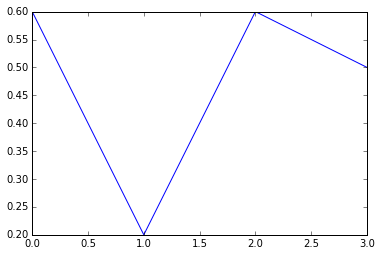

In [372]:
plt.plot([0.6, 0.2, 0.6, 0.5])

In [261]:
def unique(a, b):
    return list(set(a) != set(b))
def intersect(a, b):
    return list(set(a) & set(b))
def union(a, b):
    return list(set(a) | set(b))

In [98]:
df_ON = df_ON_OF[[19,6,7,8,9]];

In [99]:
df_OF = df_ON_OF[[19,10,11,12,13]]

In [100]:
df_YN = df_YN_ON[[19,6,7,8,9]]

In [101]:
df_YF = df_YN_YF[[19,10,11,12,13]]

In [102]:
dft = pd.merge(df_ON, df_OF, how='outer', on='gene')

In [103]:
dft = pd.merge(dft, df_YN, how='outer', on='gene')

In [104]:
dft = pd.merge(dft, df_YF, how='outer', on='gene')

In [107]:
dft.dropna(thresh=(2), axis=0);

In [108]:
dft = dft[pd.notnull(dft).all(axis=1)]

In [109]:
import math
import numpy as np

In [144]:
sum(dft.ix[:,1])

190820.36254290395

In [142]:
dft.ix[:,0][0]

'Gnai3'

In [143]:
len(dft.ix[:,1])

14514

In [138]:
ncols = len(dft.columns)
gene_names = dft.ix[:,0]
for i in range(1, ncols, 4):   #ncols):
    sample1_name = dft.columns[i]
    sample_list = []
    sample1 = dft.ix[:,i]
    for j in range(1, ncols):
        
        sample2_name = dft.columns[j]
        
        sample2 = dft.ix[:,j]
        #print sample1[0], sample2[0]
        logfc = np.log(sample2/sample1)
        logfc = logfc[logfc < 100]
        upreg = len(logfc[logfc > 1.4])
        downreg = len(logfc[logfc < -1.4])
        #print sample1_name, sample2_name, upreg, downreg
        dist = upreg + downreg
        regratio = upreg - downreg
        sample_list.append([sample2_name, dist, upreg, downreg])
        
    print sample1_name
    for n in sample_list:
        print n
    #print sample_list
#        print sample1/sample2

AT2.old.naive.20150416.1
['AT2.old.naive.20150416.1', 0, 0, 0]
['AT2.old.naive.20150416.2', 341, 136, 205]
['AT2.old.naive.20150416.3', 205, 122, 83]
['AT2.old.naive.20150416.4', 220, 103, 117]
['AT2.old.flu.20150416.1', 512, 261, 251]
['AT2.old.flu.20150416.2', 540, 309, 231]
['AT2.old.flu.20150416.3', 569, 354, 215]
['AT2.old.flu.20150416.4', 551, 273, 278]
['AT2.young.naive.20150416.1', 480, 251, 229]
['AT2.young.naive.20150416.2', 454, 151, 303]
['AT2.young.naive.20150416.3', 683, 242, 441]
['AT2.young.naive.20150416.4', 527, 237, 290]
['AT2.young.flu.20150416.1', 648, 427, 221]
['AT2.young.flu.20150416.2', 706, 349, 357]
['AT2.young.flu.20150416.3', 613, 293, 320]
['AT2.young.flu.20150416.4', 928, 360, 568]
AT2.old.flu.20150416.1
['AT2.old.naive.20150416.1', 499, 160, 339]
['AT2.old.naive.20150416.2', 499, 181, 318]
['AT2.old.naive.20150416.3', 414, 191, 223]
['AT2.old.naive.20150416.4', 394, 131, 263]
['AT2.old.flu.20150416.1', 0, 0, 0]
['AT2.old.flu.20150416.2', 192, 71, 121]
['

In [125]:
l = [1,2,3]
l.insert(0, 5)
l

[5, 1, 2, 3]

In [114]:

logfc = np.log(fc) 
logfc = logfc[logfc < 100]
logfc = logfc[logfc > 1.4]
len(logfc)
#np.log(fc)[100 > np.log(fc) > 1]

91

In [60]:
dft.ix[:,(1,4)]

,AT2.old.naive.20150416.1,AT2.old.naive.20150416.4
0,3.416110,3.308861
1,0.097670,0.074135
3,0.894176,0.843899
4,10.409801,10.361103
5,47.013339,45.876615
6,0.268831,0.288828
7,4.265999,3.849834
8,0.983380,1.244032
9,0.114189,0.090050
10,0.032568,0.070629


In [ ]:
dfs = [df_ON, df_OF, df_YN, df_YF]

In [ ]:
len(df_ON)

In [ ]:
def make_tree(dfs):
    ndf = len(dfs)
    mat
    for df1_ind in range(ndf):
        for df2_ind in range(df1_ind+1,ndf):
            merged_df = pd.merge(dfs[df1_ind], dfs[df2_ind], how = 'outer', on='gene')
            
            #merged_df['ratio'] = float(merged_df[[1]]) #sum(float(merged_df[[1,2,3,4]]))
            #for gene_ind in range(len(merged_df)):
        ### GET ratios
                
        ### GET SIMILARITY
        ### [ YN [1, 0.4, 0.8. 0.7],
        ###   ON [0.6, 1, 0.9, 0.2],
        ###   YF [0.4, 0.3, 1, 0.6],
        ###   OF [0.3, 0.9, 0.1, 1]]
        
        ### TREE FIGURE
        ###      YF (2)
        ###     /
        ###  YN(1)- ON(3)- OF(4)
        
        ###  [[1,2],[1,3],[3,4]]
        
        ### START WITH
        ### [[1,2],[1,3],[1,4]]
        ### [1-2] 0.3
        ### [1-3] 0.8
        ### [1-4] 0.5
        ### Then go to 2
        ### [2-1] 0.3 (ok)
        ### [2-3] 0.9 (>[1-3], change)
                    ### [[1,2],[2,3],[1,4]]
        ### [2-4] 0.2 (<[1-4], no change)
        ### On to 3...
        ### [3-1] 0.3 (ok)
        ### [3-2] 0.1 (<[1-3], no change)
        ### [3-4] 0.9 (>[1-4], change
                    ### [[1,2],[1,3],[3,4]])
        
        ### [1-3] ok
        sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
        for i in range(ndf):
            ## Initialize tree starting with i
            tree = []
            for j in range(ndf):
                tree[j] = [i,j]
                #similarity_matrix sim
                
                
            for j in range(ndf):
                sim_ij = sim[i,j]
                for k in range(ndf):
                    sim_ik = sim[i,k]
                    if sim_ik > sim_ij:
                        tree[j] = [i,k]
                    
                
                
    
    #return merged_df
        
            
make_tree(dfs);

In [1]:
import random
ndf = 4
sim = [[random.random() for i in range(ndf)] for j in range(ndf)]

In [ ]:
sim[2][3]

In [16]:
def make_tree2():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    nodes = [i for i in range(ndf)]
    for i in range(ndf):
        #print "begin", i
            ## Initialize tree starting with i
        tree = []# [0 for x in range(ndf-1)]
        
        j_nodes = [z for z in range(ndf)]
        j_nodes.remove(i)
        for j in j_nodes: 
            tree.append([i,j])
                #similarity_matrix sim
                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            print sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree2()

2.43375728697
{0: [9], 8: [3, 4], 5: [1], 6: [2], 9: [5, 6, 7, 8]}
3.05063194328
{8: [2, 9], 1: [0], 3: [7], 9: [3, 5, 6, 8], 7: [4]}
2.55725908136
{8: [3, 5], 9: [0, 6, 7, 8], 2: [0, 1, 4]}
2.77380068303
{8: [4, 9], 9: [1, 5, 6, 8], 3: [2, 7], 6: [2]}
2.08813976117
{8: [3, 5, 9], 9: [6, 8], 3: [7], 4: [1, 3], 5: [1]}
2.28974163779
{8: [2, 3, 9], 9: [6, 7, 8], 2: [1, 4], 5: [4]}
3.59076686783
{8: [3, 4], 9: [0, 5, 7, 8], 4: [2], 5: [1], 6: [5]}
3.33739106913
{8: [9], 9: [3, 5, 8], 5: [4], 6: [1, 2], 7: [5, 6]}
3.8889433135
{8: [2, 4, 7], 9: [1, 6, 7], 5: [0], 7: [2, 4]}
3.10973953185
{8: [0, 2, 3, 4, 5], 9: [7], 4: [7], 7: [1, 6]}


In [16]:
def make_tree_rand():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    seq = [i for i in range(ndf)]

    nodes = [random.choice() for i in range(ndf)]
    n_iter = 10
    
    ### Initialize tree
    tree = []# [0 for x in range(ndf-1)]
    
    j_nodes = [z for z in range(ndf)]
    j_nodes.remove(i)
    for j in j_nodes: 
        tree.append([i,j])
                #similarity_matrix sim
    for i in range(n_iter):
        #print "begin", i
            ## Initialize tree starting with i

                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            error = sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree_rand()

2.43375728697
{0: [9], 8: [3, 4], 5: [1], 6: [2], 9: [5, 6, 7, 8]}
3.05063194328
{8: [2, 9], 1: [0], 3: [7], 9: [3, 5, 6, 8], 7: [4]}
2.55725908136
{8: [3, 5], 9: [0, 6, 7, 8], 2: [0, 1, 4]}
2.77380068303
{8: [4, 9], 9: [1, 5, 6, 8], 3: [2, 7], 6: [2]}
2.08813976117
{8: [3, 5, 9], 9: [6, 8], 3: [7], 4: [1, 3], 5: [1]}
2.28974163779
{8: [2, 3, 9], 9: [6, 7, 8], 2: [1, 4], 5: [4]}
3.59076686783
{8: [3, 4], 9: [0, 5, 7, 8], 4: [2], 5: [1], 6: [5]}
3.33739106913
{8: [9], 9: [3, 5, 8], 5: [4], 6: [1, 2], 7: [5, 6]}
3.8889433135
{8: [2, 4, 7], 9: [1, 6, 7], 5: [0], 7: [2, 4]}
3.10973953185
{8: [0, 2, 3, 4, 5], 9: [7], 4: [7], 7: [1, 6]}


In [16]:
def make_tree_easy():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    seq = [i for i in range(ndf)]

    nodes = [random.choice() for i in range(ndf)]
    n_iter = 10
    
    ### Initialize tree
    tree = []# [0 for x in range(ndf-1)]
    
    j_nodes = [z for z in range(ndf)]
    j_nodes.remove(i)
    for j in j_nodes: 
        tree.append([i,j])
                #similarity_matrix sim
    for i in range(n_iter):
        #print "begin", i
            ## Initialize tree starting with i

                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            error = sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree_easy()

2.43375728697
{0: [9], 8: [3, 4], 5: [1], 6: [2], 9: [5, 6, 7, 8]}
3.05063194328
{8: [2, 9], 1: [0], 3: [7], 9: [3, 5, 6, 8], 7: [4]}
2.55725908136
{8: [3, 5], 9: [0, 6, 7, 8], 2: [0, 1, 4]}
2.77380068303
{8: [4, 9], 9: [1, 5, 6, 8], 3: [2, 7], 6: [2]}
2.08813976117
{8: [3, 5, 9], 9: [6, 8], 3: [7], 4: [1, 3], 5: [1]}
2.28974163779
{8: [2, 3, 9], 9: [6, 7, 8], 2: [1, 4], 5: [4]}
3.59076686783
{8: [3, 4], 9: [0, 5, 7, 8], 4: [2], 5: [1], 6: [5]}
3.33739106913
{8: [9], 9: [3, 5, 8], 5: [4], 6: [1, 2], 7: [5, 6]}
3.8889433135
{8: [2, 4, 7], 9: [1, 6, 7], 5: [0], 7: [2, 4]}
3.10973953185
{8: [0, 2, 3, 4, 5], 9: [7], 4: [7], 7: [1, 6]}


In [ ]:
tree = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5]]

In [ ]:
[i+j for i,j in tree]

In [3]:
def printsorted(tree):
    tree.sort()
    tree_dict = {}
    for i in range(len(tree)):
        if tree[i][0] not in tree_dict:
            tree_dict[tree[i][0]] = [tree[i][1]]
        else:
            tree_dict[tree[i][0]].append(tree[i][1])
        
    print tree_dict
            

In [ ]:
t = [[3, 1], [1, 2], [0, 3], [0, 4], [3, 5]]

In [ ]:
t.sort

In [ ]:
t

In [ ]:
for i in t.remove(1):
    print t

In [ ]:
sim

In [ ]:
tdf = df_OF

In [ ]:
tdf[1:2]

In [ ]:
tdf[1:2][[1,2,3,4]]

In [ ]:
col.apply(

In [ ]:
float(tdf[[1]][0])

In [ ]:
tdf.append(tdf[[1]])